# 神经网络
## 全连接层
### 张量方式实现

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = ['STKaiti']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 创建 W,b 张量
x = tf.random.normal([2,784])
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
# 线性变换
o1 = tf.matmul(x,w1) + b1 
# 激活函数
o1 = tf.nn.relu(o1) 
o1

<tf.Tensor: id=32, shape=(2, 256), dtype=float32, numpy=
array([[1.4457572e-01, 0.0000000e+00, 0.0000000e+00, 1.5885776e+00,
        1.0439749e+00, 7.7912319e-01, 0.0000000e+00, 1.3450572e+00,
        0.0000000e+00, 0.0000000e+00, 4.3180938e+00, 0.0000000e+00,
        0.0000000e+00, 4.1043224e+00, 3.6832197e+00, 2.0345888e+00,
        0.0000000e+00, 2.4156928e+00, 6.2482119e-01, 2.1313906e+00,
        0.0000000e+00, 0.0000000e+00, 2.8110793e+00, 1.2761320e+00,
        3.3316123e-01, 0.0000000e+00, 0.0000000e+00, 4.0703683e+00,
        3.6970644e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.1246948e+00, 4.4117540e-01, 2.8882909e+00,
        0.0000000e+00, 0.0000000e+00, 9.7089911e-01, 3.3954732e+00,
        4.1278057e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.7234616e+00, 8.6819875e-01, 2.2879472e+00,
        0.0000000e+00, 2.2198222e+00, 0.0000000e+00, 3.1001923e+00,
        1.1919616e+00, 3.3295627e+00, 0.0000000e+00, 0.0000

### 层方式实现

In [3]:
x = tf.random.normal([4,28*28])
# 导入层模块
from tensorflow.keras import layers 
# 创建全连接层，指定输出节点数和激活函数
fc = layers.Dense(512, activation=tf.nn.relu)
# 通过 fc 类实例完成一次全连接层的计算，返回输出张量
h1 = fc(x) 
h1

<tf.Tensor: id=65, shape=(4, 512), dtype=float32, numpy=
array([[0.30526173, 1.4002054 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.14786741, 1.9189566 , ..., 0.        , 0.        ,
        1.9087815 ],
       [2.654635  , 0.        , 1.280081  , ..., 0.        , 0.42551   ,
        1.1506792 ],
       [0.        , 0.        , 0.        , ..., 0.01546198, 0.        ,
        0.        ]], dtype=float32)>

上述通过一行代码即可以创建一层全连接层 fc， 并指定输出节点数为 512， 输入的节点数在fc(x)计算时自动获取， 并创建内部权值张量$W$和偏置张量$\mathbf{b}$。 我们可以通过类内部的成员名 kernel 和 bias 来获取权值张量$W$和偏置张量$\mathbf{b}$对象

In [4]:
# 获取 Dense 类的权值矩阵
fc.kernel 

<tf.Variable 'dense/kernel:0' shape=(784, 512) dtype=float32, numpy=
array([[ 0.06673512, -0.02965283,  0.00828745, ...,  0.06302126,
        -0.00772014, -0.05110519],
       [-0.01418904,  0.04908816, -0.02749477, ...,  0.05126443,
        -0.03161873,  0.05034576],
       [-0.05878403, -0.00868686,  0.0597257 , ...,  0.0382687 ,
        -0.0149098 ,  0.05203287],
       ...,
       [ 0.00840023,  0.04076394, -0.00407338, ...,  0.04379862,
         0.01195769, -0.01303417],
       [ 0.02782042, -0.02848876,  0.062751  , ..., -0.04502054,
        -0.05900744,  0.0626393 ],
       [ 0.01346859,  0.05516848, -0.00456174, ...,  0.05716816,
        -0.05639091, -0.0405523 ]], dtype=float32)>

In [5]:
# 获取 Dense 类的偏置向量
fc.bias 

<tf.Variable 'dense/bias:0' shape=(512,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.

In [6]:
# 待优化参数列表
fc.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.06673512, -0.02965283,  0.00828745, ...,  0.06302126,
         -0.00772014, -0.05110519],
        [-0.01418904,  0.04908816, -0.02749477, ...,  0.05126443,
         -0.03161873,  0.05034576],
        [-0.05878403, -0.00868686,  0.0597257 , ...,  0.0382687 ,
         -0.0149098 ,  0.05203287],
        ...,
        [ 0.00840023,  0.04076394, -0.00407338, ...,  0.04379862,
          0.01195769, -0.01303417],
        [ 0.02782042, -0.02848876,  0.062751  , ..., -0.04502054,
         -0.05900744,  0.0626393 ],
        [ 0.01346859,  0.05516848, -0.00456174, ...,  0.05716816,
         -0.05639091, -0.0405523 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [7]:
# 返回所有参数列表
fc.variables 

[<tf.Variable 'dense/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.06673512, -0.02965283,  0.00828745, ...,  0.06302126,
         -0.00772014, -0.05110519],
        [-0.01418904,  0.04908816, -0.02749477, ...,  0.05126443,
         -0.03161873,  0.05034576],
        [-0.05878403, -0.00868686,  0.0597257 , ...,  0.0382687 ,
         -0.0149098 ,  0.05203287],
        ...,
        [ 0.00840023,  0.04076394, -0.00407338, ...,  0.04379862,
          0.01195769, -0.01303417],
        [ 0.02782042, -0.02848876,  0.062751  , ..., -0.04502054,
         -0.05900744,  0.0626393 ],
        [ 0.01346859,  0.05516848, -0.00456174, ...,  0.05716816,
         -0.05639091, -0.0405523 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

## 神经网络
### 张量方式实现

In [8]:
# 隐藏层 1 张量
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
# 隐藏层 2 张量
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
# 隐藏层 3 张量
w3 = tf.Variable(tf.random.truncated_normal([128, 64], stddev=0.1))
b3 = tf.Variable(tf.zeros([64]))
# 输出层张量
w4 = tf.Variable(tf.random.truncated_normal([64, 10], stddev=0.1))
b4 = tf.Variable(tf.zeros([10]))

In [9]:
with tf.GradientTape() as tape: # 梯度记录器
    # x: [b, 28*28]
    # 隐藏层 1 前向计算， [b, 28*28] => [b, 256]
    h1 = x@w1 + tf.broadcast_to(b1, [x.shape[0], 256])
    h1 = tf.nn.relu(h1)
    # 隐藏层 2 前向计算， [b, 256] => [b, 128]
    h2 = h1@w2 + b2
    h2 = tf.nn.relu(h2)
    # 隐藏层 3 前向计算， [b, 128] => [b, 64]
    h3 = h2@w3 + b3
    h3 = tf.nn.relu(h3)
    # 输出层前向计算， [b, 64] => [b, 10]
    h4 = h3@w4 + b4

### 层方式实现

In [10]:
# 导入常用网络层 layers
from tensorflow.keras import layers,Sequential
# 隐藏层 1
fc1 = layers.Dense(256, activation=tf.nn.relu) 
# 隐藏层 2
fc2 = layers.Dense(128, activation=tf.nn.relu) 
# 隐藏层 3
fc3 = layers.Dense(64, activation=tf.nn.relu) 
# 输出层
fc4 = layers.Dense(10, activation=None) 

In [11]:
x = tf.random.normal([4,28*28])
# 通过隐藏层 1 得到输出
h1 = fc1(x) 
# 通过隐藏层 2 得到输出
h2 = fc2(h1) 
# 通过隐藏层 3 得到输出
h3 = fc3(h2) 
# 通过输出层得到网络输出
h4 = fc4(h3) 

对于这种数据依次向前传播的网络， 也可以通过 Sequential 容器封装成一个网络大类对象，调用大类的前向计算函数一次即可完成所有层的前向计算，使用起来更加方便。

In [12]:
# 导入 Sequential 容器
from tensorflow.keras import layers,Sequential
# 通过 Sequential 容器封装为一个网络类
model = Sequential([
    layers.Dense(256, activation=tf.nn.relu) , # 创建隐藏层 1
    layers.Dense(128, activation=tf.nn.relu) , # 创建隐藏层 2
    layers.Dense(64, activation=tf.nn.relu) , # 创建隐藏层 3
    layers.Dense(10, activation=None) , # 创建输出层
])

In [13]:
out = model(x) # 前向计算得到输出

## 激活函数

###  Sigmoid

$$\text{Sigmoid}(x) \triangleq \frac{1}{1 + e^{-x}}$$

In [14]:
# 构造-6~6 的输入向量
x = tf.linspace(-6.,6.,10)
x

<tf.Tensor: id=406, shape=(10,), dtype=float32, numpy=
array([-6.       , -4.6666665, -3.3333333, -2.       , -0.6666665,
        0.666667 ,  2.       ,  3.333334 ,  4.666667 ,  6.       ],
      dtype=float32)>

In [15]:
# 通过 Sigmoid 函数
sigmoid_y = tf.nn.sigmoid(x)
sigmoid_y

<tf.Tensor: id=407, shape=(10,), dtype=float32, numpy=
array([0.00247264, 0.00931597, 0.03444517, 0.11920291, 0.33924365,
       0.6607564 , 0.8807971 , 0.96555483, 0.99068403, 0.9975274 ],
      dtype=float32)>

In [16]:
def set_plt_ax():
    # get current axis 获得坐标轴对象
    ax = plt.gca()                                           

    ax.spines['right'].set_color('none') 
    # 将右边 上边的两条边颜色设置为空 其实就相当于抹掉这两条边
    ax.spines['top'].set_color('none')         

    ax.xaxis.set_ticks_position('bottom')   
    # 指定下边的边作为 x 轴，指定左边的边为 y 轴
    ax.yaxis.set_ticks_position('left') 

    # 指定 data  设置的bottom(也就是指定的x轴)绑定到y轴的0这个点上
    ax.spines['bottom'].set_position(('data', 0)) 
    ax.spines['left'].set_position(('data', 0))

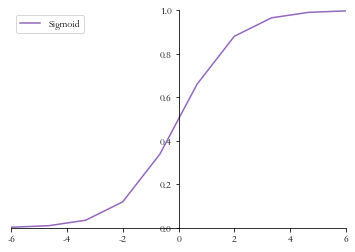

In [17]:
set_plt_ax()
plt.plot(x, sigmoid_y, color='C4', label='Sigmoid')
plt.xlim(-6, 6)
plt.ylim(0, 1)
plt.legend(loc=2)
plt.show()

### ReLU

$$\text{ReLU}(x) \triangleq \max(0, x)$$

In [18]:
# 通过 ReLU 激活函数
relu_y = tf.nn.relu(x) 
relu_y

<tf.Tensor: id=464, shape=(10,), dtype=float32, numpy=
array([0.      , 0.      , 0.      , 0.      , 0.      , 0.666667,
       2.      , 3.333334, 4.666667, 6.      ], dtype=float32)>

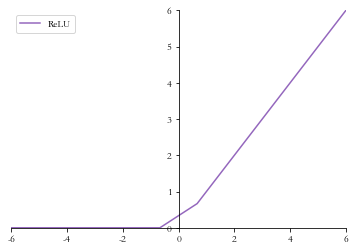

In [19]:
set_plt_ax()

plt.plot(x, relu_y, color='C4', label='ReLU')
plt.xlim(-6, 6)
plt.ylim(0, 6)
plt.legend(loc=2)
plt.show()

### LeakyReLU

$$\text{LeakyReLU}(x) \triangleq \left\{ \begin{array}{cc}
x \quad x \geqslant 0 \\
px \quad x < 0
\end{array} \right.$$

In [20]:
# 通过 LeakyReLU 激活函数
leakyrelu_y = tf.nn.leaky_relu(x, alpha=0.1)
leakyrelu_y

<tf.Tensor: id=521, shape=(10,), dtype=float32, numpy=
array([-0.6       , -0.46666667, -0.33333334, -0.2       , -0.06666666,
        0.666667  ,  2.        ,  3.333334  ,  4.666667  ,  6.        ],
      dtype=float32)>

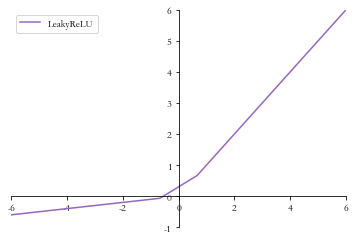

In [21]:
set_plt_ax()

plt.plot(x, leakyrelu_y, color='C4', label='LeakyReLU')
plt.xlim(-6, 6)
plt.ylim(-1, 6)
plt.legend(loc=2)
plt.show()

### Tanh
$$\tanh(x)=\frac{e^x-e^{-x}}{e^x + e^{-x}}= 2 \cdot \text{sigmoid}(2x) - 1$$

In [22]:
# 通过 tanh 激活函数
tanh_y = tf.nn.tanh(x)
tanh_y

<tf.Tensor: id=578, shape=(10,), dtype=float32, numpy=
array([-0.9999877 , -0.99982315, -0.997458  , -0.9640276 , -0.58278286,
        0.5827831 ,  0.9640276 ,  0.997458  ,  0.99982315,  0.9999877 ],
      dtype=float32)>

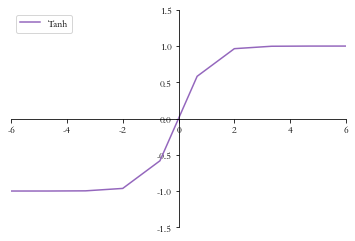

In [23]:
set_plt_ax()

plt.plot(x, tanh_y, color='C4', label='Tanh')
plt.xlim(-6, 6)
plt.ylim(-1.5, 1.5)
plt.legend(loc=2)
plt.show()

## 输出层设计

### [0,1]区间，和为 1

$$Softmax(z_i) \triangleq \frac{e^{z_i}}{\sum_{j=1}^{d_{out}} e^{z_j}}$$

In [24]:
z = tf.constant([2.,1.,0.1])
# 通过 Softmax 函数
tf.nn.softmax(z) 

<tf.Tensor: id=636, shape=(3,), dtype=float32, numpy=array([0.6590012, 0.242433 , 0.0985659], dtype=float32)>

In [25]:
# 构造输出层的输出
z = tf.random.normal([2,10]) 
# 构造真实值
y_onehot = tf.constant([1,3]) 
# one-hot 编码
y_onehot = tf.one_hot(y_onehot, depth=10) 
# 输出层未使用 Softmax 函数，故 from_logits 设置为 True
# 这样 categorical_crossentropy 函数在计算损失函数前，会先内部调用 Softmax 函数
loss = tf.keras.losses.categorical_crossentropy(y_onehot,z,from_logits=True)
loss = tf.reduce_mean(loss) # 计算平均交叉熵损失
loss

<tf.Tensor: id=682, shape=(), dtype=float32, numpy=2.1910672>

In [26]:
# 创建 Softmax 与交叉熵计算类，输出层的输出 z 未使用 softmax
criteon = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
loss = criteon(y_onehot,z) # 计算损失
loss

<tf.Tensor: id=732, shape=(), dtype=float32, numpy=2.1910672>

### [-1, 1]

In [27]:
x = tf.linspace(-6.,6.,10)
# tanh 激活函数
tf.tanh(x) 

<tf.Tensor: id=737, shape=(10,), dtype=float32, numpy=
array([-0.9999877 , -0.99982315, -0.997458  , -0.9640276 , -0.58278286,
        0.5827831 ,  0.9640276 ,  0.997458  ,  0.99982315,  0.9999877 ],
      dtype=float32)>

## 误差计算

### 均方差误差函数

$$\text{MSE}(y, o) \triangleq \frac{1}{d_{out}} \sum_{i=1}^{d_{out}}(y_i-o_i)^2$$
MSE 误差函数的值总是大于等于 0，当 MSE 函数达到最小值 0 时， 输出等于真实标签，此时神经网络的参数达到最优状态。

In [28]:
# 构造网络输出
o = tf.random.normal([2,10]) 
# 构造真实值
y_onehot = tf.constant([1,3]) 
y_onehot = tf.one_hot(y_onehot, depth=10)
# 计算均方差
loss = tf.keras.losses.MSE(y_onehot, o) 
loss

<tf.Tensor: id=751, shape=(2,), dtype=float32, numpy=array([1.2226775, 0.9393095], dtype=float32)>

In [29]:
# 计算 batch 均方差
loss = tf.reduce_mean(loss) 
loss

<tf.Tensor: id=753, shape=(), dtype=float32, numpy=1.0809934>

In [30]:
# 创建 MSE 类
criteon = tf.keras.losses.MeanSquaredError()
# 计算 batch 均方差
loss = criteon(y_onehot,o) 
loss

<tf.Tensor: id=773, shape=(), dtype=float32, numpy=1.0809934>

### 交叉熵误差函数

$$
\begin{aligned} H(p \| q) 
&=D_{K L}(p \| q) \\
&=\sum_{j} y_{j} \log \left(\frac{y_j}{o_j}\right) \\ 
&= 1 \cdot \log \frac{1}{o_i}+ \sum_{j \neq i} 0 \cdot \log \left(\frac{0}{o_j}\right) \\
& =-\log o_{i} 
\end{aligned}
$$

##  汽车油耗预测实战

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses

In [32]:
def load_dataset():
    # 在线下载汽车效能数据集
    dataset_path = keras.utils.get_file("auto-mpg.data",
                                        "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

    # 效能（公里数每加仑），气缸数，排量，马力，重量
    # 加速度，型号年份，产地
    column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                    'Acceleration', 'Model Year', 'Origin']
    raw_dataset = pd.read_csv(dataset_path, names=column_names,
                              na_values="?", comment='\t',
                              sep=" ", skipinitialspace=True)

    dataset = raw_dataset.copy()
    return dataset

In [33]:
dataset = load_dataset()
# 查看部分数据
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [34]:
def preprocess_dataset(dataset):
    dataset = dataset.copy()
    # 统计空白数据,并清除
    dataset = dataset.dropna()

    # 处理类别型数据，其中origin列代表了类别1,2,3,分布代表产地：美国、欧洲、日本
    # 其弹出这一列
    origin = dataset.pop('Origin')
    # 根据origin列来写入新列
    dataset['USA'] = (origin == 1) * 1.0
    dataset['Europe'] = (origin == 2) * 1.0
    dataset['Japan'] = (origin == 3) * 1.0

    # 切分为训练集和测试集
    train_dataset = dataset.sample(frac=0.8, random_state=0)
    test_dataset = dataset.drop(train_dataset.index)

    return train_dataset, test_dataset

In [35]:
train_dataset, test_dataset = preprocess_dataset(dataset)

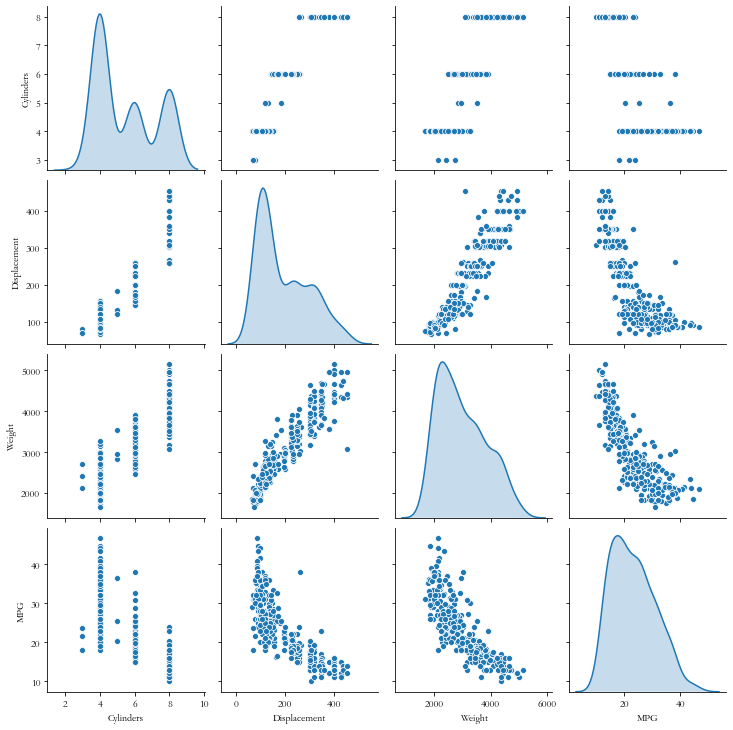

In [36]:
# 统计数据
sns_plot = sns.pairplot(train_dataset[["Cylinders", "Displacement", "Weight", "MPG"]], diag_kind="kde")

In [37]:
# 查看训练集的输入X的统计数据
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [38]:
def norm(x, train_stats):
    """
    标准化数据
    :param x:
    :param train_stats: get_train_stats(train_dataset)
    :return:
    """
    return (x - train_stats['mean']) / train_stats['std']

In [39]:
# 移动MPG油耗效能这一列为真实标签Y
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

# 进行标准化
normed_train_data = norm(train_dataset, train_stats)
normed_test_data = norm(test_dataset, train_stats)

print(normed_train_data.shape,train_labels.shape)
print(normed_test_data.shape, test_labels.shape)

(314, 9) (314,)
(78, 9) (78,)


In [40]:
class Network(keras.Model):
    # 回归网络
    def __init__(self):
        super(Network, self).__init__()
        # 创建3个全连接层
        self.fc1 = layers.Dense(64, activation='relu')
        self.fc2 = layers.Dense(64, activation='relu')
        self.fc3 = layers.Dense(1)

    def call(self, inputs):
        # 依次通过3个全连接层
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)

        return x

In [41]:
def build_model():
    # 创建网络
    model = Network()
    model.build(input_shape=(4, 9))
    model.summary()
    return model

In [42]:
model = build_model()
optimizer = tf.keras.optimizers.RMSprop(0.001)
train_db = tf.data.Dataset.from_tensor_slices((normed_train_data.values, train_labels.values))
train_db = train_db.shuffle(100).batch(32)

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              multiple                  640       
_________________________________________________________________
dense_10 (Dense)             multiple                  4160      
_________________________________________________________________
dense_11 (Dense)             multiple                  65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [43]:
def train(model, train_db, optimizer, normed_test_data, test_labels):
    train_mae_losses = []
    test_mae_losses = []
    for epoch in range(200):
        for step, (x, y) in enumerate(train_db):

            with tf.GradientTape() as tape:
                out = model(x)
                loss = tf.reduce_mean(losses.MSE(y, out))
                mae_loss = tf.reduce_mean(losses.MAE(y, out))

            if step % 10 == 0:
                print(epoch, step, float(loss))

            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

        train_mae_losses.append(float(mae_loss))
        out = model(tf.constant(normed_test_data.values))
        test_mae_losses.append(tf.reduce_mean(losses.MAE(test_labels, out)))

    return train_mae_losses, test_mae_losses

In [44]:
def plot(train_mae_losses, test_mae_losses):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(train_mae_losses, label='Train')
    plt.plot(test_mae_losses, label='Test')
    plt.legend()
    # plt.ylim([0,10])
    plt.legend()
    plt.show()

In [45]:
train_mae_losses, test_mae_losses = train(model, train_db, optimizer, normed_test_data, test_labels)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

0 0 631.2608642578125
1 0 498.2984924316406
2 0 463.0345458984375
3 0 407.7413330078125
4 0 294.35791015625
5 0 222.97335815429688
6 0 175.49615478515625
7 0 165.08721923828125
8 0 140.70892333984375
9 0 116.54345703125
10 0 84.92292022705078
11 0 65.83390045166016
12 0 103.43635559082031
13 0 80.78071594238281
14 0 58.05918884277344
15 0 49.872867584228516
16 0 76.18902587890625
17 0 48.43522644042969
18 0 67.47596740722656
19 0 53.7063102722168
20 0 79.66985321044922
21 0 49.1741828918457
22 0 55.4138

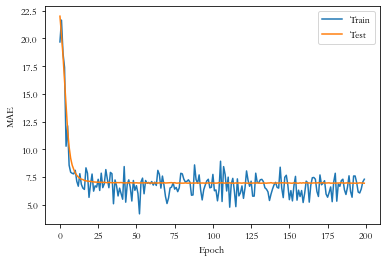

In [46]:
plot(train_mae_losses, test_mae_losses)